In [1]:
import numpy as np
import pandas as pd
import warnings
import calendar
warnings.filterwarnings('ignore')

# import libraties
import matplotlib.pyplot as plt
import seaborn as sns
#Suppressing scientific notation to float only 
pd.options.display.float_format = '{:,.2f}'.format

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
#Import the Camera Accessory data set
CameraAccessory=pd.read_csv('CameraAccessory.csv')
CameraAccessory.head()

,Unnamed: 0,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,...,nan,-0.07,2.22,2.79,1.72,1.12,-0.44,-0.07,2.22,2.79
1,1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,...,nan,2.47,3.08,3.26,-0.22,-0.79,-0.82,2.47,3.08,3.26
2,2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,...,nan,0.18,0.23,-0.40,-0.73,-0.77,-0.71,0.18,0.23,-0.40
3,3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,...,0.96,0.04,-0.49,-0.54,-0.15,0.09,1.26,0.04,-0.49,-0.54
4,4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,...,0.78,-0.51,-0.56,-0.56,0.29,1.66,1.66,-0.51,-0.56,-0.56


In [3]:
# Drop unnamed variable column
CameraAccessory = CameraAccessory.drop(['Unnamed: 0'], axis=1)
CameraAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,nan,-0.07,2.22,2.79,1.72,1.12,-0.44,-0.07,2.22,2.79
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,nan,2.47,3.08,3.26,-0.22,-0.79,-0.82,2.47,3.08,3.26
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,nan,0.18,0.23,-0.40,-0.73,-0.77,-0.71,0.18,0.23,-0.40
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,0.96,0.04,-0.49,-0.54,-0.15,0.09,1.26,0.04,-0.49,-0.54
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,0.78,-0.51,-0.56,-0.56,0.29,1.66,1.66,-0.51,-0.56,-0.56


In [4]:
#checking size
CameraAccessory.shape

(196350, 65)

In [5]:
# Drop lag, MA and GMV columns
CameraAccessory = CameraAccessory.drop(['inc_LP_MA1','inc_LP_MA2','inc_LP_MA3','inc_PO_MA1','inc_PO_MA2','inc_PO_MA3','LP_lag_1_per',
           'LP_lag_2_per','LP_lag_3_per','PO_lag_1_per-1','PO_lag_1_per-2','PO_lag_1_per-1','GMV_lag_1_per','GMV_lag_2_per',
           'GMV_lag_3_per','PO_lag_1_per-3'], axis=1)
CameraAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online Marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,2015-10-17-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,2015-10-19-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,2015-10-20-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,2015-10-14-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,2015-10-17-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [6]:
# Drop unwanted variable columns
CameraAccessory = CameraAccessory.drop(['Year','Month','order_id','order_item_id','order_date','week_y','wday','week','month_date'], axis=1)
CameraAccessory.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,ItemType,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online Marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"6,400.00",1,0,0,COD,5,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",...,Luxury,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,"6,900.00",1,0,0,COD,7,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",...,Luxury,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,"1,990.00",1,0,0,COD,10,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",...,MassMarket,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,"1,690.00",1,0,0,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",...,MassMarket,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,"1,618.00",1,0,0,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",...,MassMarket,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [7]:
#Renaming column
CameraAccessory.rename({' Affiliates':'Affiliates'},axis=1, inplace=True)

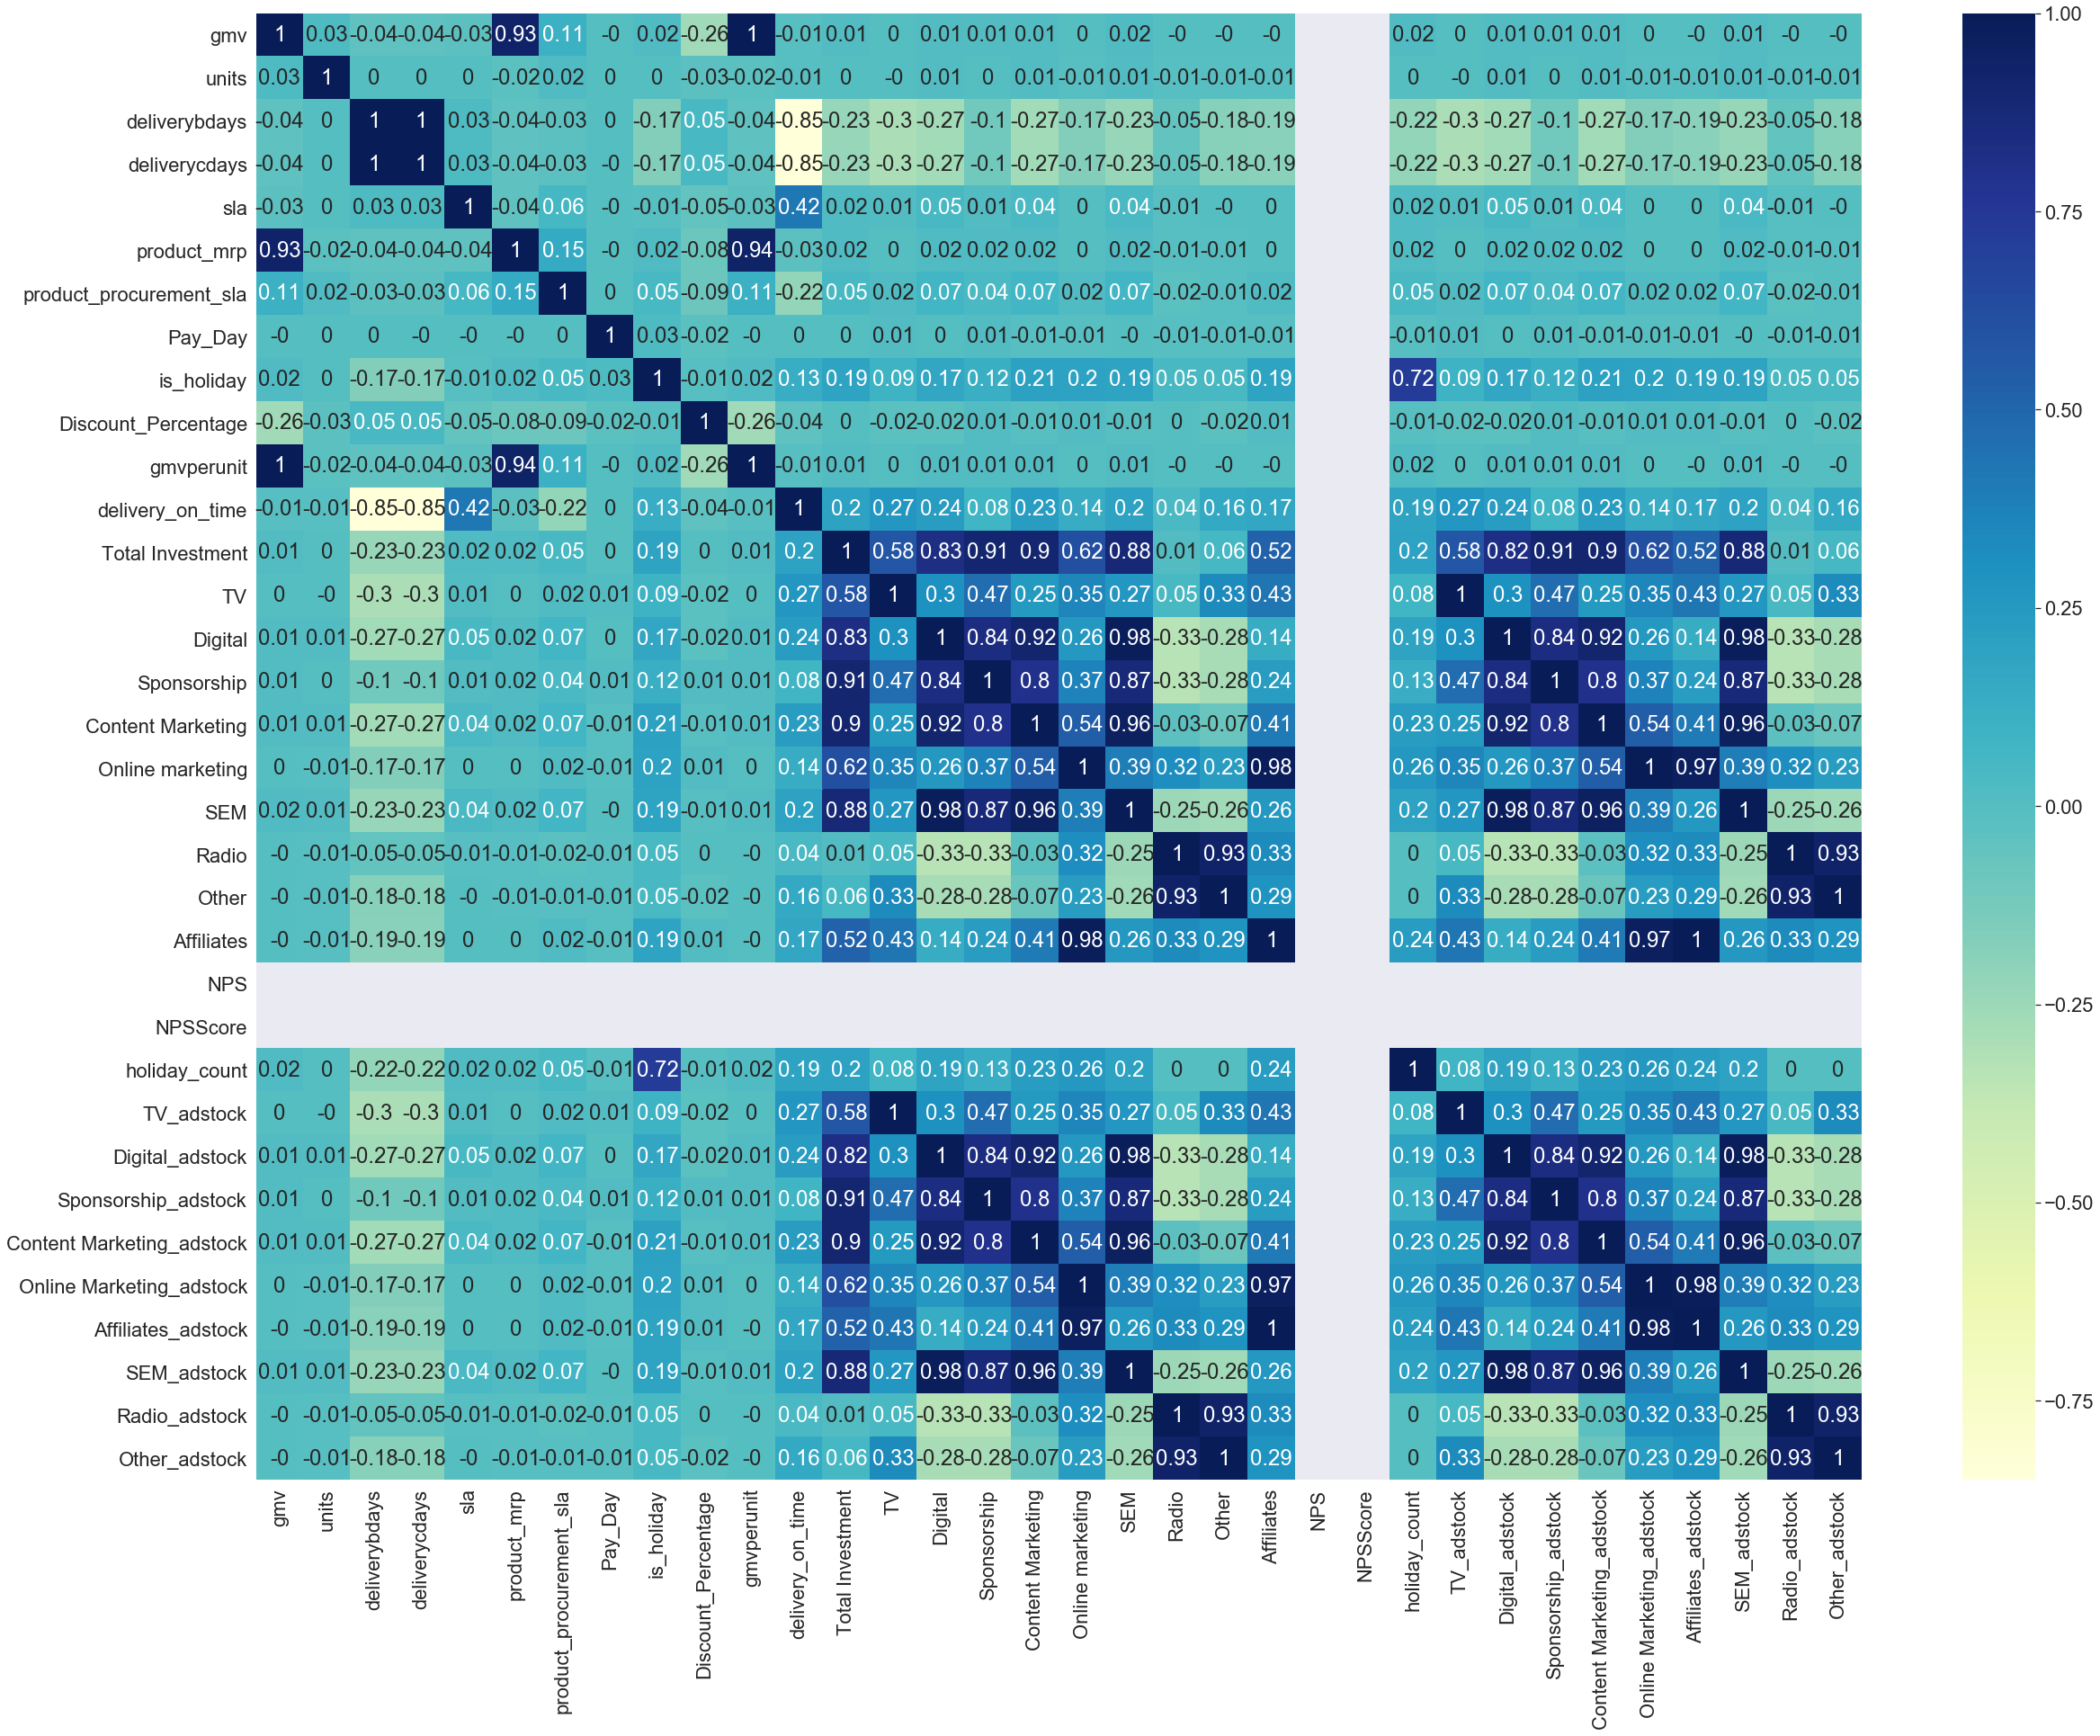

In [8]:
# Plotting a heatmap of the selected variables
plt.figure(figsize=(40, 30))
sns.set(font_scale=2)
sns.heatmap(round(CameraAccessory.corr(), 2), annot=True, cmap="YlGnBu");

In [9]:
#Drop Multicolinear variables
CameraAccessory = CameraAccessory.drop(['gmvperunit', 'deliverybdays', 'SEM_adstock', 'Digital_adstock', 
                              'Content Marketing_adstock', 'Affiliates_adstock', 'Radio_adstock', 'Other_adstock', 
                               'Online Marketing_adstock', 'Sponsorship_adstock', 'TV_adstock'], axis=1)                             
CameraAccessory.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,NPS,NPSScore,holiday_count,ItemType
0,"6,400.00",1,0,COD,5,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",nan,nan,4.00,Luxury
1,"6,900.00",1,0,COD,7,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",nan,nan,0.00,Luxury
2,"1,990.00",1,0,COD,10,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",nan,nan,0.00,MassMarket
3,"1,690.00",1,0,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",nan,nan,4.00,MassMarket
4,"1,618.00",1,0,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",nan,nan,4.00,MassMarket


In [10]:
#Listing columns
CameraAccessory.columns

Index(['gmv', 'units', 'deliverycdays', 's1_fact_order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'Pay_Day', 'is_holiday', 'special_sale', 'Discount_Percentage',
       'delivery_on_time', 'delivery_status', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'SEM', 'Radio', 'Other', 'Affiliates', 'NPS', 'NPSScore',
       'holiday_count', 'ItemType'],
      dtype='object')

In [11]:
#looking for Nan values
CameraAccessory.isnull().sum()

gmv                                   0
units                                 0
deliverycdays                         0
s1_fact_order_payment_type            0
sla                                   0
product_analytic_category             0
product_analytic_sub_category         0
product_analytic_vertical             0
product_mrp                           0
product_procurement_sla               0
Pay_Day                               0
is_holiday                            0
special_sale                          0
Discount_Percentage                   0
delivery_on_time                      0
delivery_status                       0
Total Investment                      0
TV                                    0
Digital                               0
Sponsorship                           0
Content Marketing                     0
Online marketing                      0
SEM                                   0
Radio                                 0
Other                                 0


In [12]:
CameraAccessory['NPS'] = CameraAccessory['NPS'].fillna(0)
CameraAccessory['NPSScore'] = CameraAccessory['NPSScore'].fillna(0)

In [13]:
#looking for Nan values
CameraAccessory.isnull().sum()

gmv                              0
units                            0
deliverycdays                    0
s1_fact_order_payment_type       0
sla                              0
product_analytic_category        0
product_analytic_sub_category    0
product_analytic_vertical        0
product_mrp                      0
product_procurement_sla          0
Pay_Day                          0
is_holiday                       0
special_sale                     0
Discount_Percentage              0
delivery_on_time                 0
delivery_status                  0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
SEM                              0
Radio                            0
Other                            0
Affiliates                       0
NPS                              0
NPSScore                         0
holiday_count       

In [14]:
 #Checking unique values in delivery time variable 
CameraAccessory['delivery_on_time'].unique()

array([   5.,    7.,    1.,    3.,    0.,    2.,    4.,    9.,    6.,
          8.,   10.,   -1.,   -2.,   -4.,   -3.,   12.,   11.,   -5.,
         -9.,   -7.,   -6.,   -8.,   17.,  -10.,   13.,   18.,   16.,
         14.,   19.,  -15.,   15.,   20.,  -14.,  -17.,  -11.,  -13.,
         21.,  -18.,   24.,   22.,   25.,   37.,   23.,   32.,   26.,
         27.,   35.,   31.,  -12.,  -25.,  -16.,  -23.,  -19.,  -22.,
        -21.,  -24.,  -26.,  -20.,  -38.,  -36., -109.,  -37.,  -29.,
        -40.,  -31.,  -28.,  -27.,  -34.,  -39.,   39.,   34.,  -32.,
        -33.,  -43.,  -30., -136.])

In [15]:
#Delivery time can't be negative hence taking positive values
CameraAccessory=CameraAccessory.loc[(CameraAccessory['delivery_on_time']>0)]
CameraAccessory.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,NPS,NPSScore,holiday_count,ItemType
0,"6,400.00",1,0,COD,5,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00,Luxury
1,"6,900.00",1,0,COD,7,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",0,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00,Luxury
2,"1,990.00",1,0,COD,10,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00,MassMarket
3,"1,690.00",1,0,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00,MassMarket
4,"1,618.00",1,0,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",3,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00,MassMarket


In [16]:
#checking size
CameraAccessory.shape

(122702, 30)

In [17]:
# Subset all categorical variables
CameraAccessory_numerical = CameraAccessory.select_dtypes(include=['int64','float64'])
CameraAccessory_numerical.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,delivery_on_time,...,Sponsorship,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,NPS,NPSScore,holiday_count
0,"6,400.00",1,0,5,"7,190.00",0,0,1,10.99,5.00,...,"191,196,038.93","7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00
1,"6,900.00",1,0,7,"7,190.00",0,0,0,4.03,7.00,...,"191,196,038.93","7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00
2,"1,990.00",1,0,10,"2,099.00",3,0,0,5.19,7.00,...,"191,196,038.93","7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00
3,"1,690.00",1,0,4,"2,099.00",3,0,0,19.49,1.00,...,"191,196,038.93","7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00
4,"1,618.00",1,0,6,"2,099.00",3,0,1,22.92,3.00,...,"191,196,038.93","7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00


In [18]:
# Subset all categorical variables
CameraAccessory_categorical = CameraAccessory.select_dtypes(include=['object'])
CameraAccessory_categorical.head()

,s1_fact_order_payment_type,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,special_sale,delivery_status,ItemType
0,COD,CameraAccessory,CameraAccessory,CameraTripod,Daussera,Early,Luxury
1,COD,CameraAccessory,CameraAccessory,CameraTripod,Regular Day,Early,Luxury
2,COD,CameraAccessory,CameraAccessory,CameraTripod,Regular Day,Early,MassMarket
3,Prepaid,CameraAccessory,CameraAccessory,CameraTripod,Regular Day,Early,MassMarket
4,Prepaid,CameraAccessory,CameraAccessory,CameraTripod,Daussera,Early,MassMarket


In [19]:
# Convert into dummies
ecart_CA_dummies = pd.get_dummies(CameraAccessory_categorical, drop_first=True)
ecart_CA_dummies.head()

,s1_fact_order_payment_type_Prepaid,product_analytic_vertical_CameraAccessory,product_analytic_vertical_CameraBag,product_analytic_vertical_CameraBattery,product_analytic_vertical_CameraBatteryCharger,product_analytic_vertical_CameraBatteryGrip,product_analytic_vertical_CameraEyeCup,product_analytic_vertical_CameraFilmRolls,product_analytic_vertical_CameraHousing,product_analytic_vertical_CameraMicrophone,...,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Rakshabandhan,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [20]:
# Drop categorical variable columns
CameraAccessory = CameraAccessory.drop(list(CameraAccessory_categorical.columns), axis=1)

In [21]:
#Looking dataframe now
CameraAccessory.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,delivery_on_time,...,Sponsorship,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,NPS,NPSScore,holiday_count
0,"6,400.00",1,0,5,"7,190.00",0,0,1,10.99,5.00,...,"191,196,038.93","7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00
1,"6,900.00",1,0,7,"7,190.00",0,0,0,4.03,7.00,...,"191,196,038.93","7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00
2,"1,990.00",1,0,10,"2,099.00",3,0,0,5.19,7.00,...,"191,196,038.93","7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00
3,"1,690.00",1,0,4,"2,099.00",3,0,0,19.49,1.00,...,"191,196,038.93","7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00
4,"1,618.00",1,0,6,"2,099.00",3,0,1,22.92,3.00,...,"191,196,038.93","7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00


In [22]:
# Concatenate dummy variables with X
ecart_CA = pd.concat([CameraAccessory, ecart_CA_dummies], axis=1)
ecart_CA.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,delivery_on_time,...,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Rakshabandhan,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
0,"6,400.00",1,0,5,"7,190.00",0,0,1,10.99,5.00,...,1,0,0,0,0,0,0,0,0,0
1,"6,900.00",1,0,7,"7,190.00",0,0,0,4.03,7.00,...,0,0,0,0,0,0,1,0,0,0
2,"1,990.00",1,0,10,"2,099.00",3,0,0,5.19,7.00,...,0,0,0,0,0,0,1,0,0,1
3,"1,690.00",1,0,4,"2,099.00",3,0,0,19.49,1.00,...,0,0,0,0,0,0,1,0,0,1
4,"1,618.00",1,0,6,"2,099.00",3,0,1,22.92,3.00,...,1,0,0,0,0,0,0,0,0,1


In [23]:
#Checking detail columns
ecart_CA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122702 entries, 0 to 196349
Data columns (total 58 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   gmv                                             122702 non-null  float64
 1   units                                           122702 non-null  int64  
 2   deliverycdays                                   122702 non-null  int64  
 3   sla                                             122702 non-null  int64  
 4   product_mrp                                     122702 non-null  float64
 5   product_procurement_sla                         122702 non-null  int64  
 6   Pay_Day                                         122702 non-null  int64  
 7   is_holiday                                      122702 non-null  int64  
 8   Discount_Percentage                             122702 non-null  float64
 9   delivery_on_time          

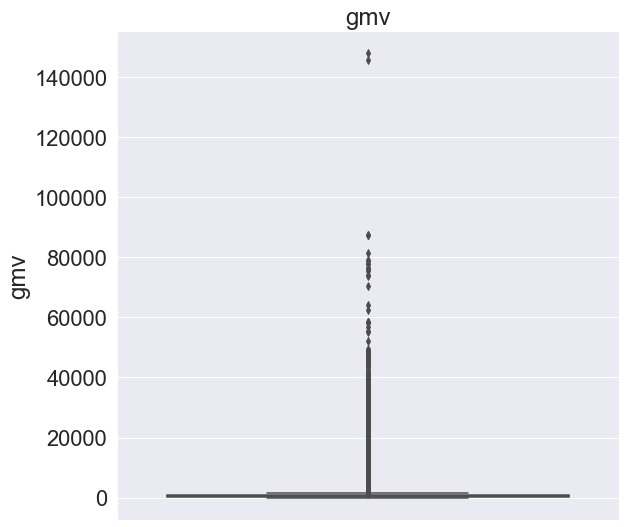

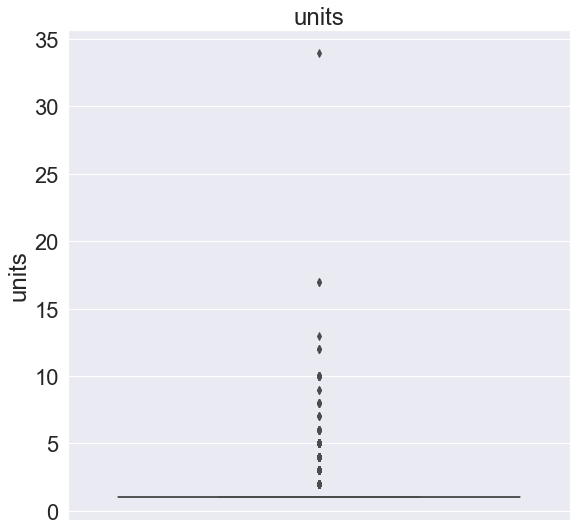

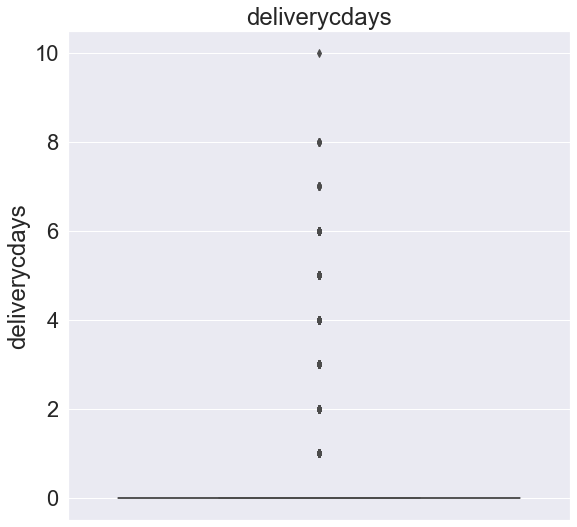

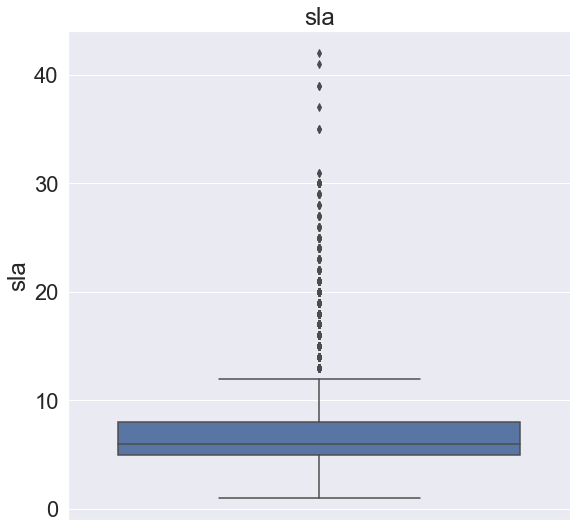

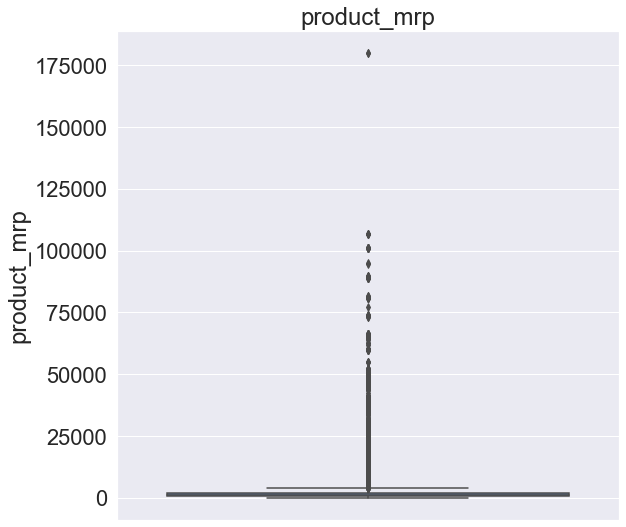

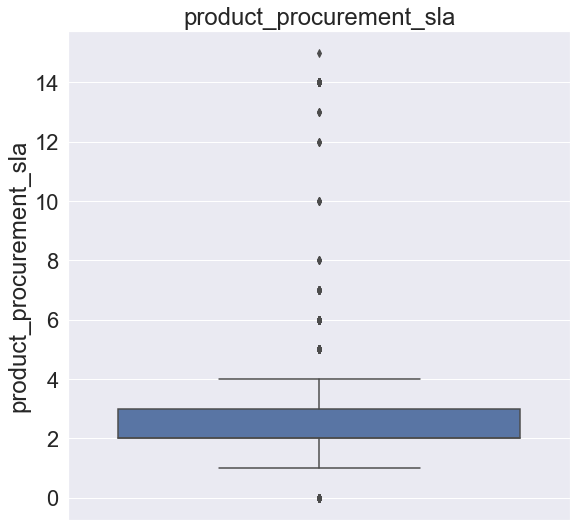

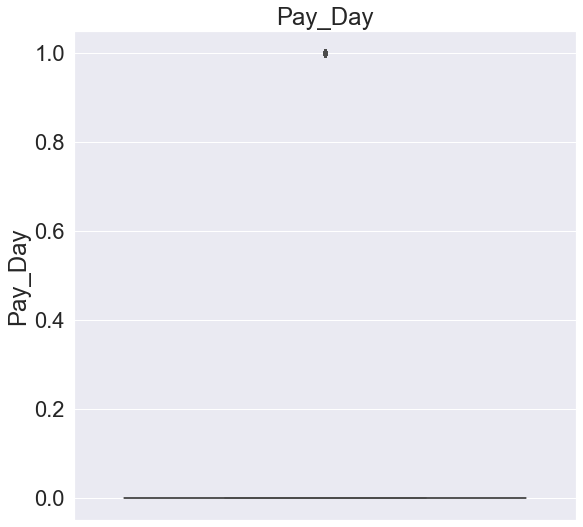

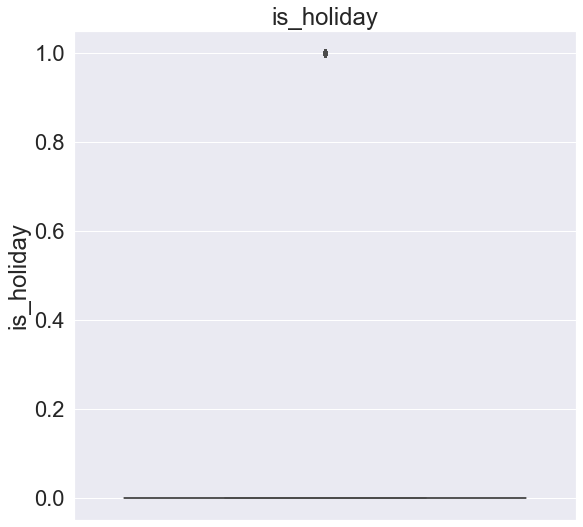

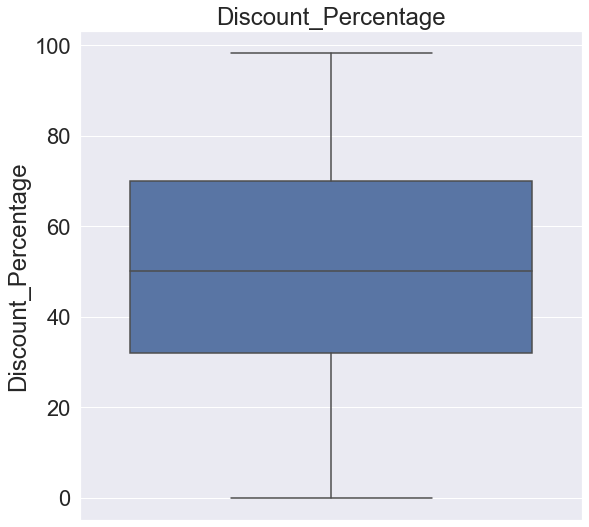

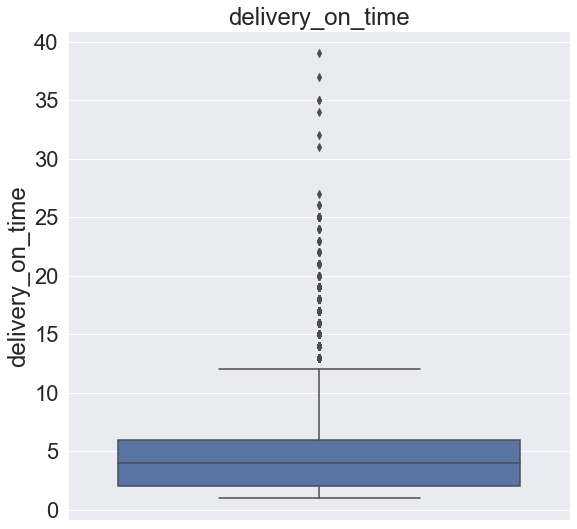

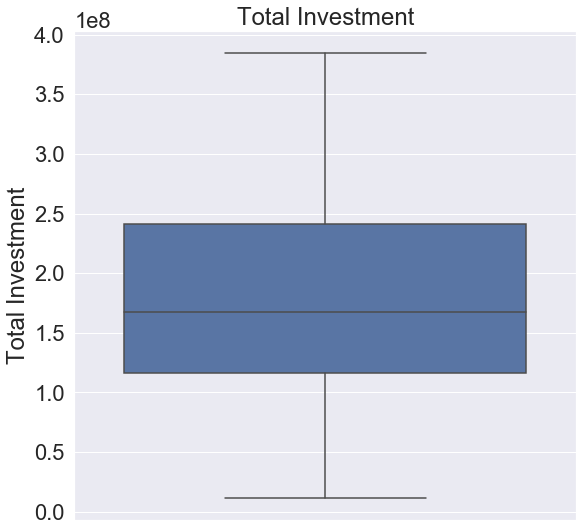

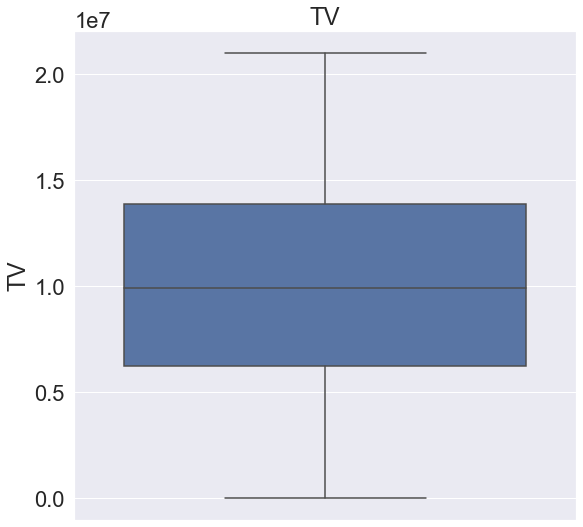

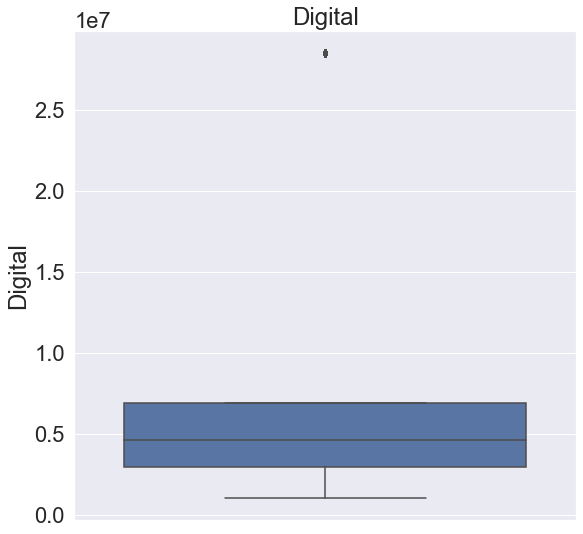

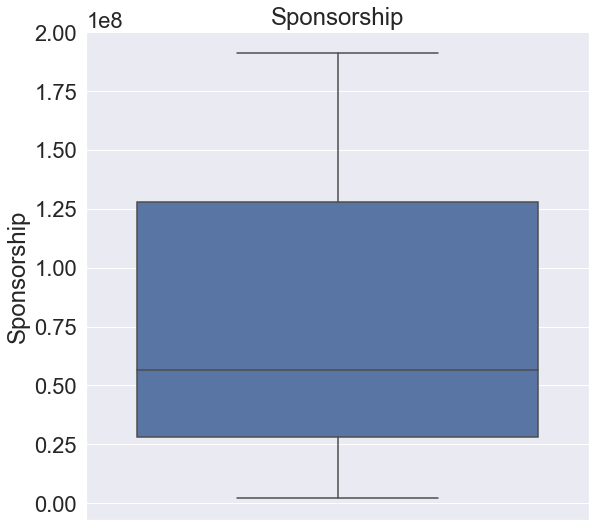

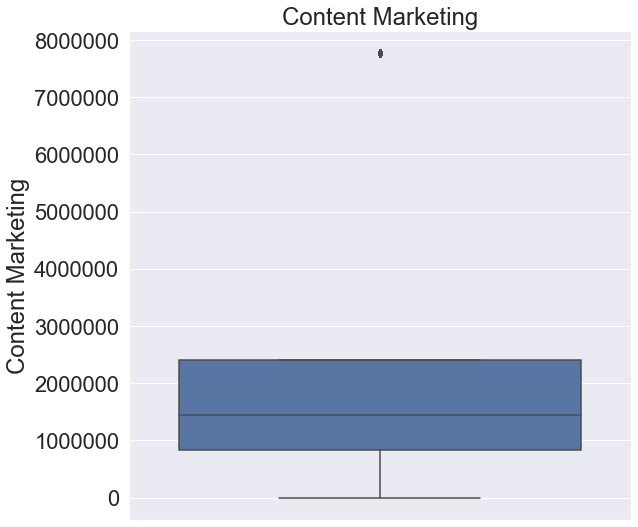

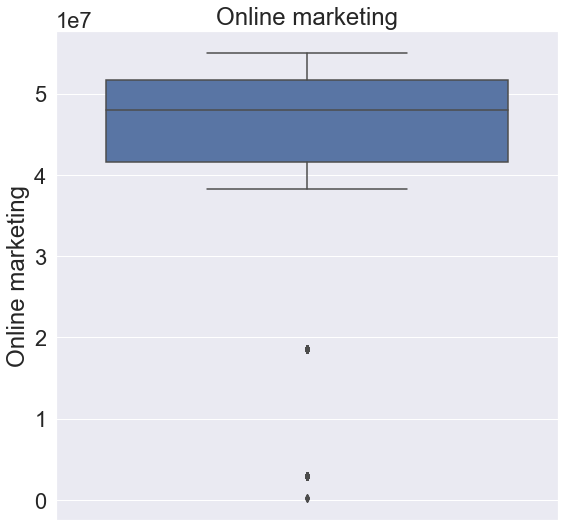

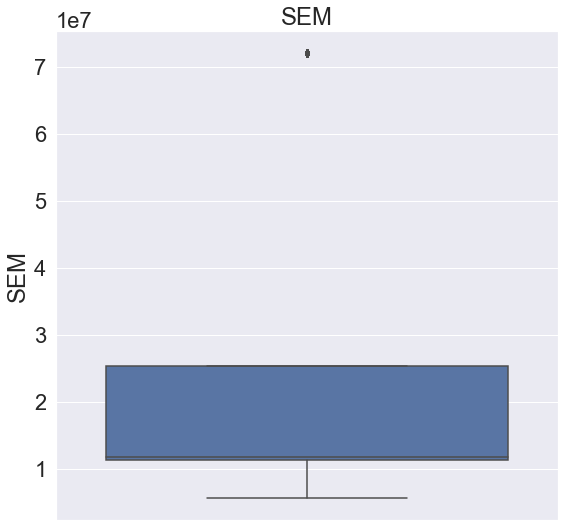

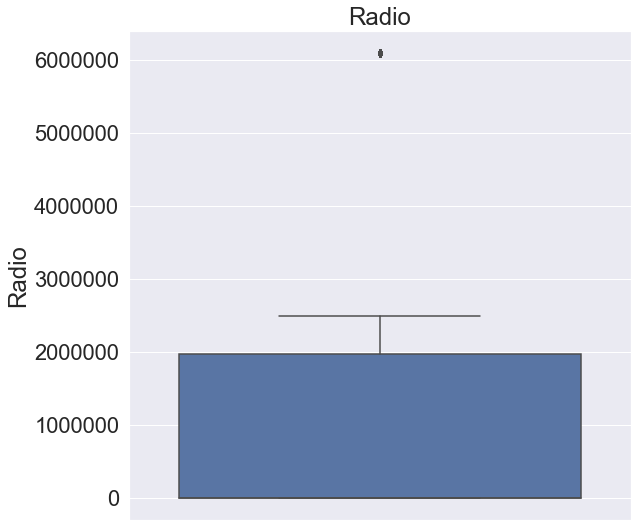

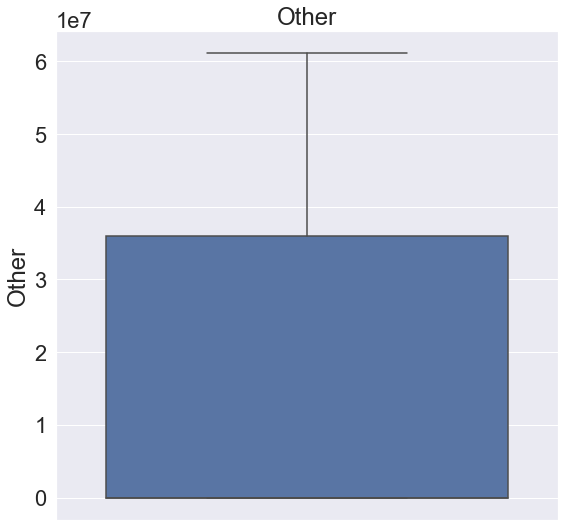

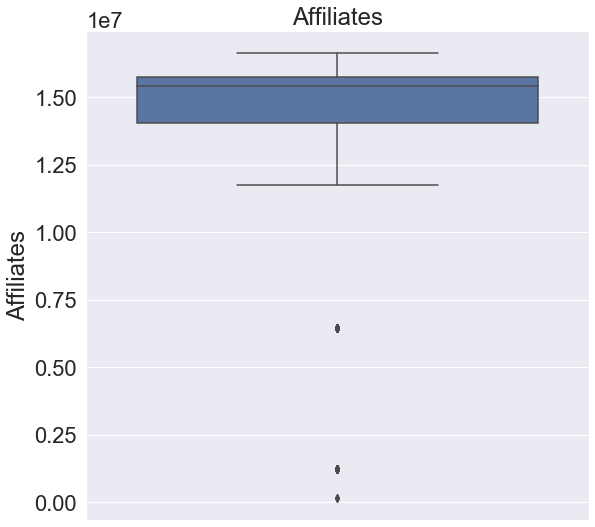

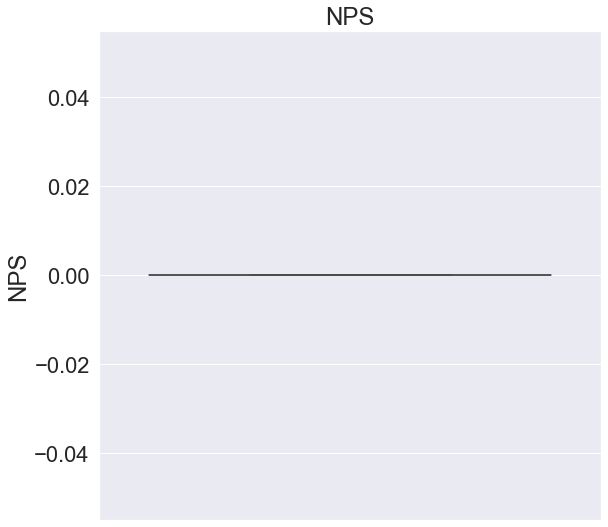

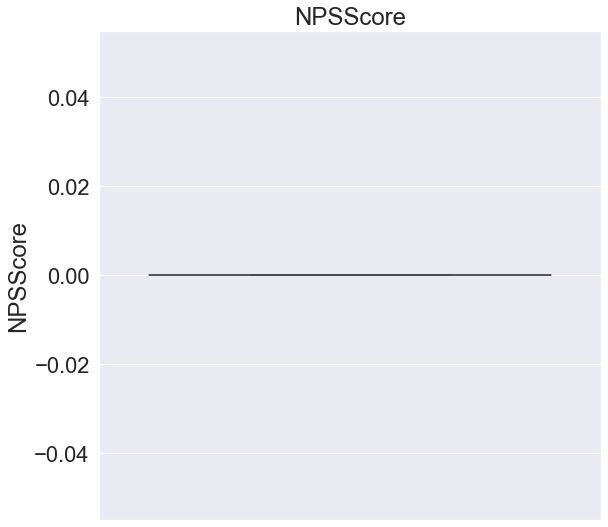

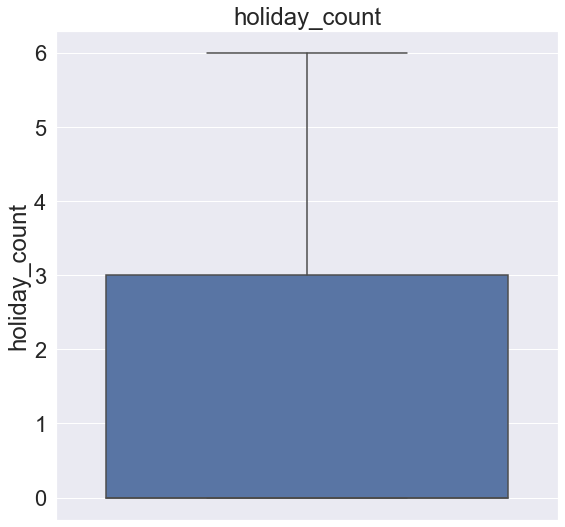

In [24]:
#Checking outliers in dataframe
for col in list(CameraAccessory.columns):
    plt.figure(figsize=(9,9))
    sns.boxplot(data=CameraAccessory, y=col).set_title(col)

In [25]:
#function for outlier treatment
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [26]:
#outlier df
outlier_cols = ['gmv', 'units', 'deliverycdays', 'sla', 'product_mrp', 'delivery_on_time', 
               'Online marketing', 'SEM', 'Affiliates', 'Digital', 'Content Marketing', 'Radio']

In [27]:
#removing outliers
for col in outlier_cols:
        remove_outlier(ecart_CA, col)

In [28]:
#checking size
ecart_CA.shape

(122702, 58)

In [29]:
# Import the required library
from sklearn.model_selection import train_test_split

In [30]:
#train-test split 
df_train, df_test = train_test_split(ecart_CA, train_size=0.7, test_size=0.3, random_state=100)

In [31]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
# Create a list of the variables that you need to scale
varlist = []
dum_cols = list(ecart_CA_dummies.columns)
dum_cols.append('Pay_Day')
dum_cols.append('is_holiday')

for col in ecart_CA.columns:
    if col not in dum_cols:
        varlist.append(col)

In [34]:
# Create a list of the variables that you need to scale
varlist

['gmv',
 'units',
 'deliverycdays',
 'sla',
 'product_mrp',
 'product_procurement_sla',
 'Discount_Percentage',
 'delivery_on_time',
 'Total Investment',
 'TV',
 'Digital',
 'Sponsorship',
 'Content Marketing',
 'Online marketing',
 'SEM',
 'Radio',
 'Other',
 'Affiliates',
 'NPS',
 'NPSScore',
 'holiday_count']

In [35]:
# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [36]:
# Let's take a look at the train dataframe now
df_train.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,delivery_on_time,...,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Rakshabandhan,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
4535,0.01,0.00,0.00,0.02,0.01,0.00,0,0,0.00,0.03,...,0,0,0,0,0,0,1,0,0,1
142007,0.05,0.00,0.30,0.15,0.06,0.07,0,0,0.27,0.00,...,0,0,0,0,0,0,1,0,0,0
44919,0.00,0.00,0.00,0.12,0.00,0.07,0,0,0.40,0.11,...,0,0,0,0,0,0,1,0,0,1
74571,0.00,0.00,0.00,0.07,0.00,0.13,0,0,0.19,0.03,...,0,0,0,0,0,0,1,0,0,1
19352,0.00,0.00,0.00,0.10,0.00,0.20,0,1,0.59,0.03,...,1,0,0,0,0,0,0,0,0,1


In [37]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv')
X_train = df_train

In [38]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [39]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.24755061e-01  2.59546757e-03 -4.17529192e-03  8.04545986e-01
 -2.35154089e-03 -7.01167495e-05 -1.94215673e-04 -1.84677667e-02
  4.69647895e-03  1.23232472e+00 -5.85978451e-02 -7.64212133e-02
 -6.26814055e-01 -1.85133615e-02 -1.66146285e-01 -2.43754923e-01
 -1.58772411e-03 -2.22508477e-01 -7.19665797e-02 -2.58265631e-13
  2.72842859e-12  8.79314827e-05 -3.55998584e-04 -1.99617572e-03
  1.09781729e-03 -2.12793499e-03 -1.05495206e-03 -9.43275125e-04
 -1.37064792e-03 -2.85311745e-03  6.66411371e-14 -3.07513771e-03
 -1.23211360e-03  1.50679948e-03  1.79333978e-03 -3.37891252e-03
  1.40563191e-03  2.68417032e-03 -8.08005413e-04  8.47697395e-04
  1.04702179e-03 -1.04243290e-03 -1.20958403e-03 -1.13964393e-13
 -2.73969361e-03 -5.75574683e-04 -4.07872227e-04  7.43922721e-04
 -2.05451479e-04  3.21601321e-05 -3.09621472e-04  1.07534123e-05
 -3.40807286e-03 -3.19025233e-04 -1.17152978e-04 -2.61875495e-04
 -1.58513257e-03]
0.015658095778140126


In [41]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)

[ True False False  True  True False False  True False  True  True  True
  True  True  True  True False  True  True False False False False False
 False False False False False False False  True False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False]
[ 1 17 18  1  1 37 33  1 15  1  1  1  1  1  1  1 19  1  1 40 41 36 28  5
 23  4 10 13  6  3 43  1 11 21 20  1 22 12 26 25 24  7  9 42  2 27 29 16
 34 38 31 39  8 32 35 30 14]


In [42]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,units,product_mrp,product_procurement_sla,Discount_Percentage,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,SEM,Other,Affiliates,product_analytic_vertical_CameraMicrophone,product_analytic_vertical_ExtensionTube
4535,1.00,0.00,0.01,0.00,0.00,1.00,0.66,1.00,1.00,1.00,1.00,1.00,0.00,0.95,0,0
142007,1.00,0.00,0.06,0.07,0.27,0.44,0.15,0.03,0.37,0.23,0.97,0.15,0.18,0.92,0,0
44919,1.00,0.00,0.00,0.07,0.40,0.62,0.58,0.21,0.67,0.31,0.92,0.29,0.00,0.93,0,0
74571,1.00,0.00,0.00,0.13,0.19,0.42,0.47,0.00,0.04,0.26,0.94,0.06,1.00,1.00,0,0
19352,1.00,0.00,0.00,0.20,0.59,1.00,0.66,1.00,1.00,1.00,1.00,1.00,0.00,0.95,0,0


In [43]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 5.608e+04
Date:                Tue, 23 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:10:09   Log-Likelihood:             3.1429e+05
No. Observations:               85891   AIC:                        -6.285e+05
Df Residuals:                   85875   BIC:                        -6.284e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [44]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Total Investment,"1,549,281.73"
8,Sponsorship,"622,232.75"
12,Other,"99,730.25"
11,SEM,"89,788.48"
10,Online marketing,"22,266.74"
7,Digital,"10,648.66"
13,Affiliates,"6,533.46"
6,TV,"3,152.09"
0,const,950.11
9,Content Marketing,835.74


In [46]:
#drop 1st variable with high vif and p-value
X_train_rfe1.drop('Total Investment', axis = 1, inplace = True)

In [47]:
# Refitting with 14 variables
X_train_rfe2 = sm.add_constant(X_train_rfe1)

# Fitting the model with 14 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 5.995e+04
Date:                Tue, 23 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:10:15   Log-Likelihood:             3.1420e+05
No. Observations:               85891   AIC:                        -6.284e+05
Df Residuals:                   85876   BIC:                        -6.282e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Affiliates,866.08
9,Online marketing,821.74
8,Content Marketing,512.65
6,Digital,396.85
0,const,215.42
10,SEM,155.68
7,Sponsorship,155.12
5,TV,119.43
11,Other,57.60
3,product_procurement_sla,1.03


In [49]:
# drop 2nd variable with high vif and p-value
X_train_rfe2.drop('Affiliates', axis = 1, inplace = True)

In [50]:
# Refitting with 13 variables
X_train_rfe3 = sm.add_constant(X_train_rfe2)

# Fitting the model with 13 variables
lm3 = sm.OLS(y_train, X_train_rfe3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 6.450e+04
Date:                Tue, 23 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:10:35   Log-Likelihood:             3.1416e+05
No. Observations:               85891   AIC:                        -6.283e+05
Df Residuals:                   85877   BIC:                        -6.282e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Content Marketing,466.31
6,Digital,366.64
10,SEM,155.68
0,const,147.79
5,TV,42.25
7,Sponsorship,37.51
9,Online marketing,36.19
11,Other,34.31
3,product_procurement_sla,1.03
4,Discount_Percentage,1.03


In [52]:
# drop 3rd variable with high vif and p-value
X_train_rfe3.drop('Content Marketing', axis = 1, inplace = True)

In [53]:
# Refitting with 12 variables
X_train_rfe4 = sm.add_constant(X_train_rfe3)

# Fitting the model with 12 variables
lm4 = sm.OLS(y_train, X_train_rfe4).fit()   
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 6.987e+04
Date:                Tue, 23 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:10:54   Log-Likelihood:             3.1416e+05
No. Observations:               85891   AIC:                        -6.283e+05
Df Residuals:                   85878   BIC:                        -6.282e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,SEM,151.41
6,Digital,103.19
0,const,31.10
7,Sponsorship,17.34
5,TV,6.52
8,Online marketing,3.21
10,Other,2.72
3,product_procurement_sla,1.03
4,Discount_Percentage,1.03
2,product_mrp,1.01


In [55]:
# drop 4th variable with high p-value
X_train_rfe4.drop('SEM', axis = 1, inplace = True)

In [56]:
# Refitting with 11 variables
X_train_rfe5 = sm.add_constant(X_train_rfe4)

# Fitting the model with 11 variables
lm5 = sm.OLS(y_train, X_train_rfe5).fit()   
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 7.616e+04
Date:                Tue, 23 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:12:31   Log-Likelihood:             3.1413e+05
No. Observations:               85891   AIC:                        -6.282e+05
Df Residuals:                   85879   BIC:                        -6.281e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,21.60
7,Sponsorship,8.22
6,Digital,4.93
5,TV,3.04
9,Other,2.02
8,Online marketing,1.31
3,product_procurement_sla,1.03
4,Discount_Percentage,1.02
2,product_mrp,1.01
1,units,1.00


In [58]:
# drop 5th variable with high vif
X_train_rfe5.drop('Digital', axis = 1, inplace = True)

In [59]:
# Refitting with 10 variables
X_train_rfe6 = sm.add_constant(X_train_rfe5)

# Fitting the model with 10 variables
lm6 = sm.OLS(y_train, X_train_rfe6).fit()   
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 8.374e+04
Date:                Tue, 23 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:13:08   Log-Likelihood:             3.1411e+05
No. Observations:               85891   AIC:                        -6.282e+05
Df Residuals:                   85880   BIC:                        -6.281e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,21.56
6,Sponsorship,2.50
5,TV,2.36
8,Other,1.96
7,Online marketing,1.31
3,product_procurement_sla,1.02
4,Discount_Percentage,1.02
2,product_mrp,1.01
1,units,1.00
9,product_analytic_vertical_CameraMicrophone,1.00


In [61]:
# drop 6th variable with high vif
X_train_rfe6.drop('Sponsorship', axis = 1, inplace = True)

In [62]:
# Refitting with 9 variables
X_train_rfe7 = sm.add_constant(X_train_rfe6)

# Fitting the model with 9 variables
lm7 = sm.OLS(y_train, X_train_rfe7).fit()   
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 9.305e+04
Date:                Tue, 23 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:13:32   Log-Likelihood:             3.1411e+05
No. Observations:               85891   AIC:                        -6.282e+05
Df Residuals:                   85881   BIC:                        -6.281e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,21.11
5,TV,1.33
6,Online marketing,1.20
7,Other,1.14
3,product_procurement_sla,1.02
4,Discount_Percentage,1.02
2,product_mrp,1.01
1,units,1.00
8,product_analytic_vertical_CameraMicrophone,1.00
9,product_analytic_vertical_ExtensionTube,1.00


In [64]:
# drop 7th variable with high vif 
X_train_rfe7.drop('Other', axis = 1, inplace = True)

In [65]:
# Refitting with 8 variables
X_train_rfe8 = sm.add_constant(X_train_rfe7)

# Fitting the model with 8 variables
lm8 = sm.OLS(y_train, X_train_rfe8).fit()   
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 1.047e+05
Date:                Tue, 23 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:14:02   Log-Likelihood:             3.1410e+05
No. Observations:               85891   AIC:                        -6.282e+05
Df Residuals:                   85882   BIC:                        -6.281e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,21.11
5,TV,1.20
6,Online marketing,1.20
3,product_procurement_sla,1.02
4,Discount_Percentage,1.02
2,product_mrp,1.01
1,units,1.00
7,product_analytic_vertical_CameraMicrophone,1.00
8,product_analytic_vertical_ExtensionTube,1.00


In [67]:
#Predict error term
y_train_price = lm8.predict(X_train_rfe8)

Text(0.5, 0, 'Errors')

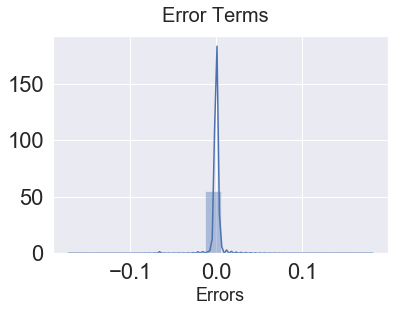

In [68]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [69]:
#fitting test data
df_test[varlist] = scaler.transform(df_test[varlist])

In [70]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [71]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
X_test_rfe2 = X_test[col1]

In [72]:
col1

Index(['units', 'product_mrp', 'product_procurement_sla',
       'Discount_Percentage', 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', 'SEM', 'Other',
       'Affiliates', 'product_analytic_vertical_CameraMicrophone',
       'product_analytic_vertical_ExtensionTube'],
      dtype='object')

In [73]:
# Let's now drop the variables we had manually eliminated as well
X_test_rfe2 = X_test_rfe2.drop(['Total Investment', 
        'Content Marketing', 'Sponsorship',
       'SEM', 'Other', 'Affiliates', 'Digital'], axis = 1)

In [74]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36811 entries, 13550 to 98083
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   const                                       36811 non-null  float64
 1   units                                       36811 non-null  float64
 2   product_mrp                                 36811 non-null  float64
 3   product_procurement_sla                     36811 non-null  float64
 4   Discount_Percentage                         36811 non-null  float64
 5   TV                                          36811 non-null  float64
 6   Online marketing                            36811 non-null  float64
 7   product_analytic_vertical_CameraMicrophone  36811 non-null  uint8  
 8   product_analytic_vertical_ExtensionTube     36811 non-null  uint8  
dtypes: float64(7), uint8(2)
memory usage: 2.3 MB


In [75]:
# Making predictions
y_pred = lm8.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

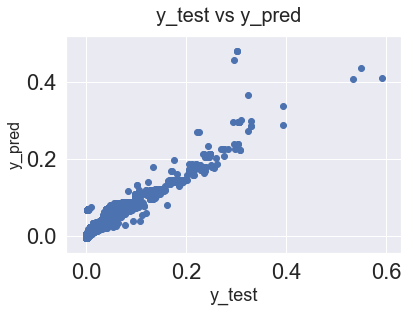

In [76]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [77]:
# r2_score for 8 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8970942306237543

In [78]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

print(rmse)

0.0063905553006147475


In [79]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np

In [80]:
regr = LinearRegression() 
  
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
regr.score(X_test, y_test)

0.9046398494403762

In [82]:
scores = cross_val_score(regr, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print('Cross Validation scores: ', scores)

print('Mean and std deviation: ', np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(regr, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold


#If this is good, continue to fit the model on the data


regr.fit(X_train, y_train)

y_hat = regr.predict(X_test)      #this gives me my predictions

regr.score(X_test, y_test)

Cross Validation scores:  [0.91693237 0.91547133 0.90840137 0.90738541 0.90812765]
Mean and std deviation:  0.9112636262646034 0.004072023539929247


0.9046398494403762

In [83]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [84]:
# model with optimal alpha
lm = Ridge(alpha=0.01)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9129414199699386
0.9046490127152191


In [85]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.9112775342219903
0.1


In [86]:
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DC0190B9C8>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
0.9112775091503847
0.09560335201873116


In [87]:
# Ridge model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.008),
 ('units', 0.124),
 ('deliverycdays', 0.002),
 ('sla', -0.003),
 ('product_mrp', 0.804),
 ('product_procurement_sla', -0.003),
 ('Pay_Day', -0.0),
 ('is_holiday', -0.0),
 ('Discount_Percentage', -0.018),
 ('delivery_on_time', 0.004),
 ('Total Investment', -0.002),
 ('TV', 0.003),
 ('Digital', 0.019),
 ('Sponsorship', 0.006),
 ('Content Marketing', 0.001),
 ('Online marketing', -0.008),
 ('SEM', -0.025),
 ('Radio', 0.018),
 ('Other', -0.016),
 ('Affiliates', 0.008),
 ('NPS', 0.0),
 ('NPSScore', 0.0),
 ('holiday_count', 0.0),
 ('s1_fact_order_payment_type_Prepaid', -0.0),
 ('product_analytic_vertical_CameraAccessory', -0.002),
 ('product_analytic_vertical_CameraBag', 0.001),
 ('product_analytic_vertical_CameraBattery', -0.002),
 ('product_analytic_vertical_CameraBatteryCharger', -0.001),
 ('product_analytic_vertical_CameraBatteryGrip', -0.001),
 ('product_analytic_vertical_CameraEyeCup', -0.001),
 ('product_analytic_vertical_CameraFilmRolls', -0.003),
 ('product_ana